###Предобработка данных и PCA

In [ ]:
import pandas
import requests
import io
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
# Импортируем библиотеки для графиков
import matplotlib.pyplot as plt
import seaborn as sns
#Clustering
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.impute import KNNImputer

from sklearn.metrics import silhouette_score
#Построение класификатора
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

url = "https://raw.githubusercontent.com/shadowmoon697/customer_personality_analysis/main/marketing_campaign.csv"
download = requests.get(url).content
ds = pd.read_csv(io.StringIO(download.decode('utf-8')))
data1 = ds.copy()

In [ ]:
data1.head

<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012      

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data1.drop(['Z_CostContact'],axis=1,inplace=True)
data1.drop(['Z_Revenue'],axis=1,inplace= True)


> Сразу отбросим столбец, про которыйв совсем ничего не известно

In [ ]:
data1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

>Пустых значений в набор данных есть только у колонки дохода

In [ ]:
#Выкенем пустые значения
mean_ = data1['Income'].mean()
data1['Income'].fillna(value=mean_ ,inplace=True)

> В наборе данных три обекта и 26 численных признаков. Описание всех признаков приведены в Word файле, сопровожадющим данную задачу.

In [ ]:
for feture in data1.columns:
  df = pandas.Series(data1[feture])
  print(data1[feture].name)
  l = len(df.unique())
  if(l >100 ):
      continue
  else:
    print(df.unique())

ID
Year_Birth
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income
Kidhome
[0 1 2]
Teenhome
[0 1 2]
Dt_Customer
Recency
[58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
[ 3  2  1  5  4 15  7  0  6  9 12  8 10 13 11]
NumWebPurchases
[ 8  1  

1. В нашем датаесте есть бинарыные признаки их - 7.
2. Есть категориальные признаки - образование клиента, его семейное положение. Семейное положение имеет максимальное число уникальных значений - 8 категорий 'Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'
3. Числовые значения: `суммарный доход`, `количество дней с момента последней покупки клиентом`. 
  * Также вещественные значения имеютстолбцы сумм потраченных на `вино, фрукты, мясо, рыбу, сладкое, драгоценности.`

  * Имеют числовые значения столбцы: `кол-во покупок приобретенных со скидкой`, а также столбцы содержащие информацию `сколько раз были совершены покупки с сайта,каталога,непосредсвтенно в магазине` и `количесвто визитов на веб страницу магазина`.

Отбросим столбец с идентификаторами клиентов

In [ ]:
data= data1.copy()
data.drop('ID',axis=1,inplace=True)

In [ ]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Объеденим некорые столбцы, для удобства и отбросим не нужные

In [ ]:
data_bus = data1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [ ]:

# Сколько детей
data['Chlidren'] = data['Kidhome'] + data['Teenhome']

# Скольок потрачено в общем на все категории товаров
data['Amount_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Число покупок в комании
data['Number_Of_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

#Клиент принял предложение
data['TotalAcceptedCmp'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

data.drop(['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],axis = 1, inplace = True)
data.drop(['Kidhome','Teenhome'],axis = 1,inplace = True)
data.drop(['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'],axis = 1, inplace = True)
data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],axis =1,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Dt_Customer          2240 non-null   object 
 5   Recency              2240 non-null   int64  
 6   NumDealsPurchases    2240 non-null   int64  
 7   NumWebVisitsMonth    2240 non-null   int64  
 8   Complain             2240 non-null   int64  
 9   Response             2240 non-null   int64  
 10  Chlidren             2240 non-null   int64  
 11  Amount_Spent         2240 non-null   int64  
 12  Number_Of_Purchases  2240 non-null   int64  
 13  TotalAcceptedCmp     2240 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 245.1+ KB


##Переходим к обработке  вещественных признаков

> На первый взгляд выбросов в данных нет, но присмотримся к параметру заработной платы и года рождения

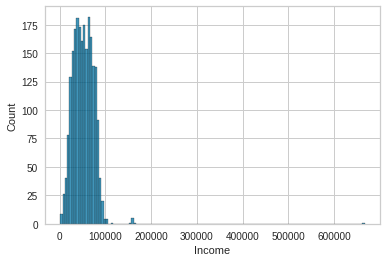

In [ ]:
sns.histplot(data['Income'])

> Можно заметить, что существует доод равынй 0, избавимся от этих значений впоследствии.

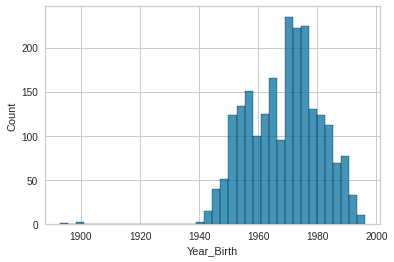

In [ ]:
sns.histplot(data["Year_Birth"])

> Как видно из графиков распределения для стобцов года рождения и зарплаты есть экстремальные значения

> Нормализуем столбцы дохода. Также сделаем из столбца с годом рождения возраст клиента


* Взгляем на распределение дохода


Text(0, 0.5, 'Income')

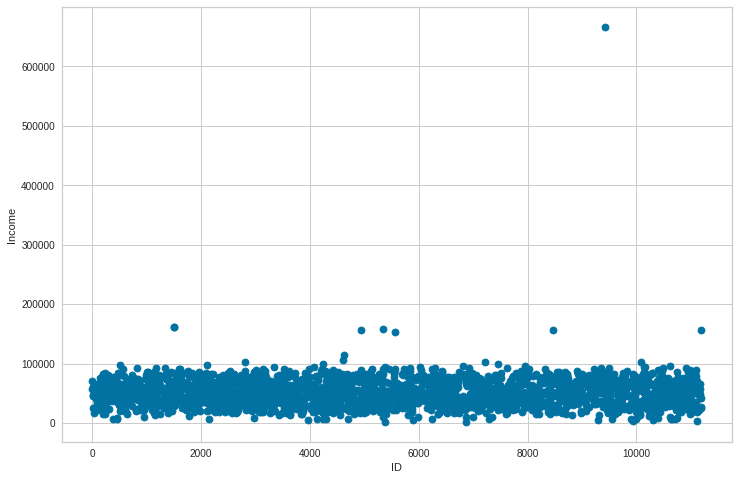

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(data1.ID,data.Income, linewidth=0.8) # using data1, bc it has 'ID' in it

plt.xlabel('ID')
plt.ylabel('Income')

> Применяем нормальное масштабирование для `Income`


In [ ]:
scale_features_std = StandardScaler() 
data['income'] = scale_features_std.fit_transform(data[['Income']]) 
data.income

0       0.235327
1      -0.235826
2       0.773633
3      -1.022732
4       0.241519
          ...   
2235    0.358568
2236    0.470064
2237    0.189106
2238    0.679035
2239    0.024838
Name: income, Length: 2240, dtype: float64

Text(0, 0.5, 'income')

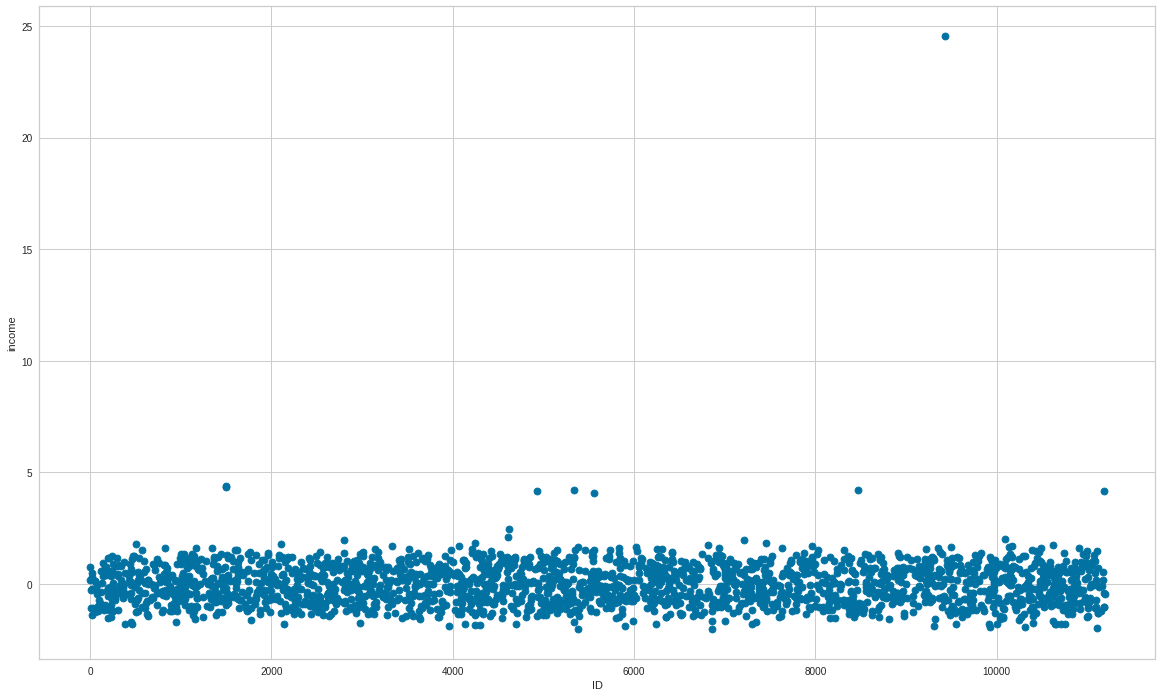

In [ ]:
# scatter plot for income
plt.figure(figsize=(20,12))
plt.scatter(data1.ID, data.income, linewidth=0.8) # using data1, bc it has 'ID' in it
plt.xlabel('ID')
plt.ylabel('income')

> Посчитаем возраст клиента

In [ ]:
data['age'] = 2022 -data['Year_Birth']

Text(0, 0.5, 'age')

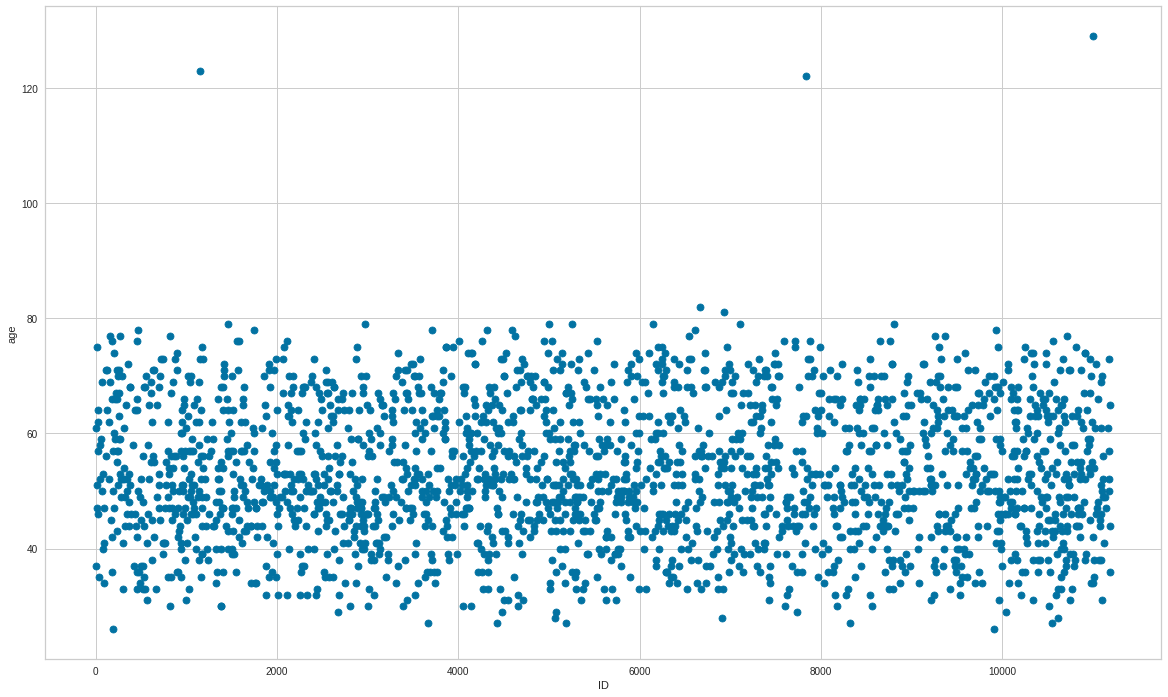

In [ ]:
# scatter plot for age
plt.figure(figsize=(20,12))
plt.scatter(data1.ID, data.age, linewidth=0.8) # using data1, bc it has 'ID' in it
plt.xlabel('ID')
plt.ylabel('age')

In [ ]:
data[data['income'] > 3]
data[data['age'] > 85]

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Chlidren,Amount_Spent,Number_Of_Purchases,TotalAcceptedCmp,income,age
192,1900,2n Cycle,Divorced,36640.0,26-09-2013,99,1,5,1,0,1,65,5,0,-0.623487,122
239,1893,2n Cycle,Single,60182.0,17-05-2014,23,1,4,0,0,1,22,3,0,0.316982,129
339,1899,PhD,Together,83532.0,26-09-2013,36,1,1,0,0,0,1853,14,1,1.249780,123


* Очень большую зарплату имеет только оидн клиент, можем от него избавиться, тк он повлиял бы особо на анализ
* Есть только три человека старше 85 лет, их тоже можно отбросить

In [ ]:
data = data.drop(data[data['age'] > 85].index)
data = data.drop(data[data['income'] > 3].index)
# Выкенем не нужные столбцы
data.drop('Year_Birth',axis=1,inplace=True)
data.drop('Income',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   object 
 1   Marital_Status       2229 non-null   object 
 2   Dt_Customer          2229 non-null   object 
 3   Recency              2229 non-null   int64  
 4   NumDealsPurchases    2229 non-null   int64  
 5   NumWebVisitsMonth    2229 non-null   int64  
 6   Complain             2229 non-null   int64  
 7   Response             2229 non-null   int64  
 8   Chlidren             2229 non-null   int64  
 9   Amount_Spent         2229 non-null   int64  
 10  Number_Of_Purchases  2229 non-null   int64  
 11  TotalAcceptedCmp     2229 non-null   int64  
 12  income               2229 non-null   float64
 13  age                  2229 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 261.2+ KB


##Теперь разберемся с категориальными признаками

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   object 
 1   Marital_Status       2229 non-null   object 
 2   Dt_Customer          2229 non-null   object 
 3   Recency              2229 non-null   int64  
 4   NumDealsPurchases    2229 non-null   int64  
 5   NumWebVisitsMonth    2229 non-null   int64  
 6   Complain             2229 non-null   int64  
 7   Response             2229 non-null   int64  
 8   Chlidren             2229 non-null   int64  
 9   Amount_Spent         2229 non-null   int64  
 10  Number_Of_Purchases  2229 non-null   int64  
 11  TotalAcceptedCmp     2229 non-null   int64  
 12  income               2229 non-null   float64
 13  age                  2229 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 261.2+ KB


> Объеденим некотрые признаки. Для образовани сделаем нет образования, высшее, и еще высшее
> Для мэритл статус сделаем вмесет или одиноки

In [ ]:
education= {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
data["Education"] = data["Education"].replace(education)

status= {"YOLO": "Single", "Absurd": "Single", "Alone": "Single", "Widow": "Single", "Divorced": "Single", "Together": "Together", "Married": "Together"}
data["Marital_Status"]= data["Marital_Status"].replace(status)


> Кодируем столбцы образоваие и семейное положение c помощью labelEncoder

In [ ]:
label = LabelEncoder()

label.fit(data.Marital_Status)
data.Marital_Status = label.transform(data.Marital_Status)

label.fit(data.Education)
data.Education = label.transform(data.Education)

data.head()

,Education,Marital_Status,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Chlidren,Amount_Spent,Number_Of_Purchases,TotalAcceptedCmp,income,age
0,0,0,04-09-2012,58,3,7,0,1,0,1617,22,0,0.235327,65
1,0,0,08-03-2014,38,2,5,0,0,2,27,4,0,-0.235826,68
2,0,1,21-08-2013,26,1,4,0,0,0,776,20,0,0.773633,57
3,0,1,10-02-2014,26,2,6,0,0,1,53,6,0,-1.022732,38
4,1,1,19-01-2014,94,5,5,0,0,1,422,14,0,0.241519,41


> Сделаем из столбца `Dt_Customer`, количество дней с того момнета как клиент зарегистрировался в компании

In [ ]:
datee = '05-09-2022'
diff = pd.to_datetime(datee) - pd.to_datetime(data['Dt_Customer'])
data['Customer_Since'] = diff.dt.days

data.drop(['Dt_Customer'],axis=1,inplace = True)
data['Customer_Since']

0       3682
1       2836
2       3183
3       2776
4       3032
        ... 
2235    3252
2236    2772
2237    3026
2238    3027
2239    3493
Name: Customer_Since, Length: 2229, dtype: int64

#Визуальный анализ

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   int64  
 1   Marital_Status       2229 non-null   int64  
 2   Recency              2229 non-null   int64  
 3   NumDealsPurchases    2229 non-null   int64  
 4   NumWebVisitsMonth    2229 non-null   int64  
 5   Complain             2229 non-null   int64  
 6   Response             2229 non-null   int64  
 7   Chlidren             2229 non-null   int64  
 8   Amount_Spent         2229 non-null   int64  
 9   Number_Of_Purchases  2229 non-null   int64  
 10  TotalAcceptedCmp     2229 non-null   int64  
 11  income               2229 non-null   float64
 12  age                  2229 non-null   int64  
 13  Customer_Since       2229 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 261.2 KB


In [ ]:
cf = data.loc[:, data.columns.isin(['Customer_Since','Recency','age','income','Number_Of_Purchases','Amount_spent',
                                    'NumDealsPurchases','NumWebVisitsMonth'])]
print(len(cf.columns))

7


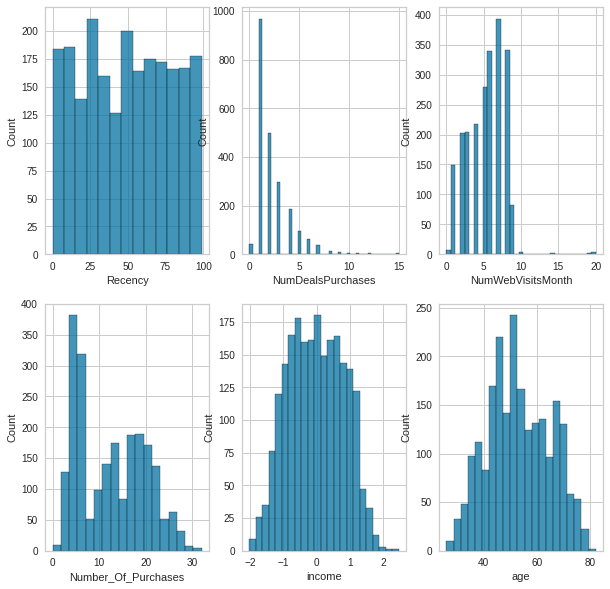

In [ ]:
figure,ax = plt.subplots(2,3,figsize=(10,10))
for feature, subplot in zip(cf, ax.flatten()):
  sns.histplot(data[feature],ax=subplot)

Избавимся от экстремальных значеий

In [ ]:
data[data['income'] > 3]

data = data.drop(data[data['income'] > 3].index)

In [ ]:
data[data['NumDealsPurchases'] > 10]

data = data.drop(data[data['NumDealsPurchases'] > 10].index)

In [ ]:
data[data['NumWebVisitsMonth'] > 9.1]

data = data.drop(data[data['NumWebVisitsMonth'] > 9.1].index)

Отброим значения равные нулю

In [ ]:
data = data.drop(data[data['NumWebVisitsMonth']  == 0 ].index)
data = data.drop(data[data['Number_Of_Purchases'] == 0].index)
data = data.drop(data[data['NumDealsPurchases'] == 0].index)

In [ ]:
data.isnull().sum()

Education              0
Marital_Status         0
Recency                0
NumDealsPurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
Chlidren               0
Amount_Spent           0
Number_Of_Purchases    0
TotalAcceptedCmp       0
income                 0
age                    0
Customer_Since         0
dtype: int64

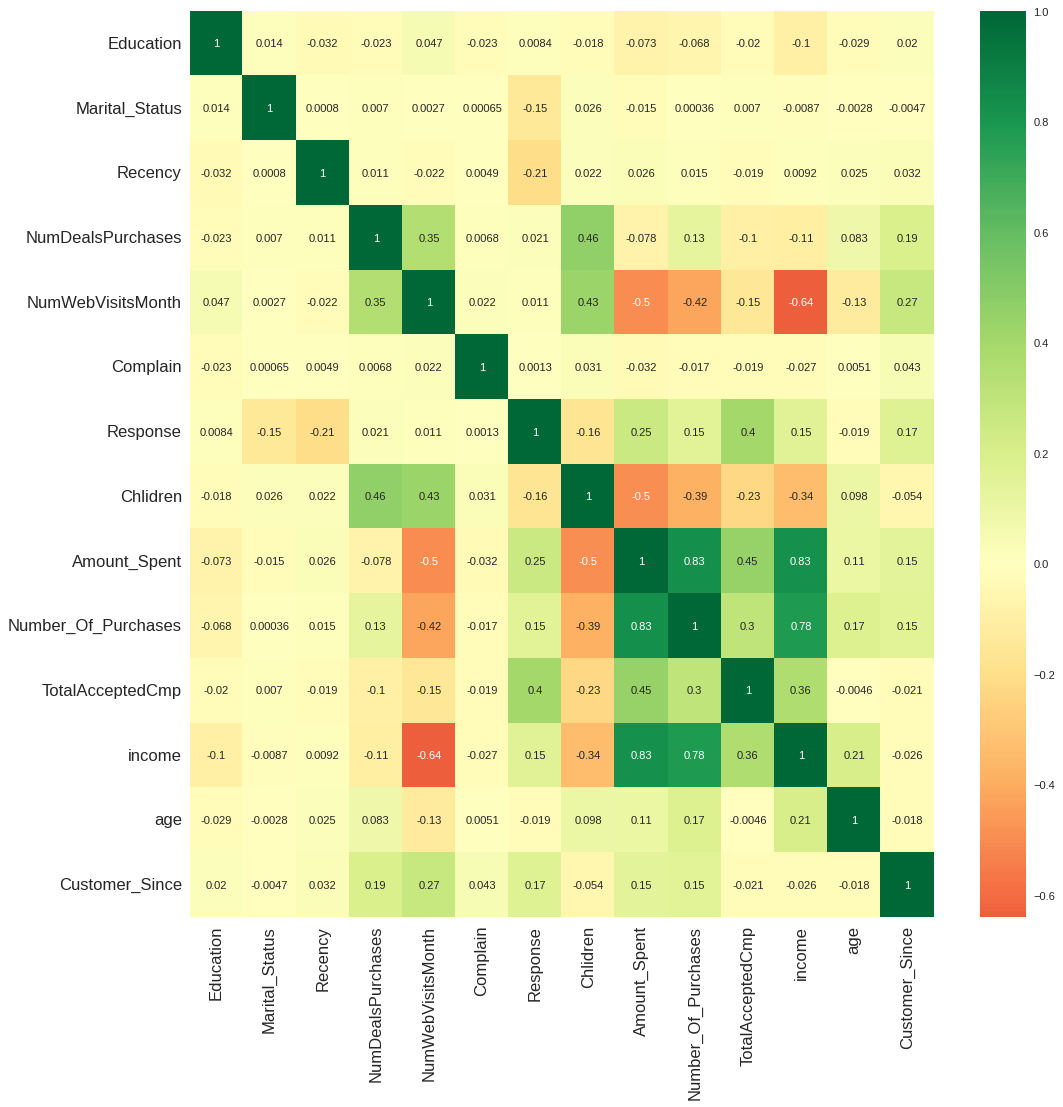

In [ ]:
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

#Подпись осей
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Высокая кореляция присутствет у нескольх параметров, сможем избавиться от нее уменьшив размерность


#Снижение размерности с помощью алгоритма PCA


In [ ]:
data_copy = data.copy()
scaler = StandardScaler()
scaler.fit(data_copy)
scaled_ds = pd.DataFrame(scaler.transform(data_copy), columns = data_copy.columns)

Для начала попробуем оставить направления, которые дают совместно 90% дисперсии

In [ ]:
pca = PCA(n_components = 0.90)
pca.fit(scaled_ds)
reduced_data = pd.DataFrame(pca.transform(scaled_ds))

print("Current number of features= ",len(reduced_data.columns))


Current number of features=  10


Число компонент равно 10

#Кластеризация

Метод состоит в построении графика объясненной ими дисперсии в зависимости от количества кластеров и использовании изгибов кривой в качестве количества используемых кластеров.

Количество компанент будет равно 10

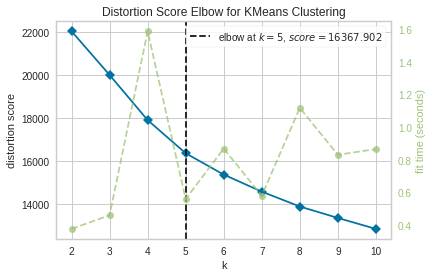

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data)
Elbow_M.show()

Посмотрим график для метода локтя вручную


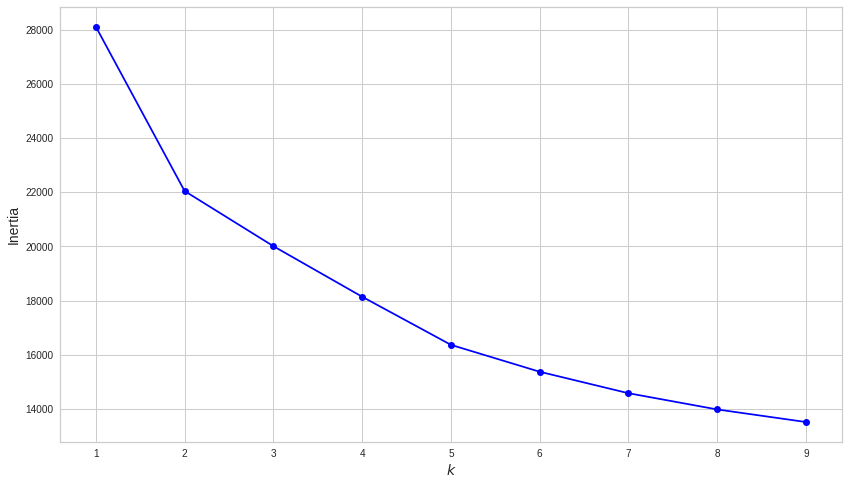

In [ ]:
plt.figure(figsize = (14,8))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(reduced_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias, "bo-" ,color = "blue")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

Попробуем вопользоваться метрикой силуэт.График силуэта имеет пиковый характер, в отличие от мягко изогнутого графика при использовании метода локтя.
> Rоэффициент «силуэт» вычисляется с помощью среднего внутрикластерного расстояния (a) и среднего расстояния до ближайшего кластера (b) по каждому образцу. Силуэт вычисляется как (b - a) / max(a, b). Поясню: b — это расстояние между a и ближайшим кластером, в который a не входит. Можно вычислить среднее значение силуэта по всем образцам и использовать его как метрику для оценки количества кластеров.

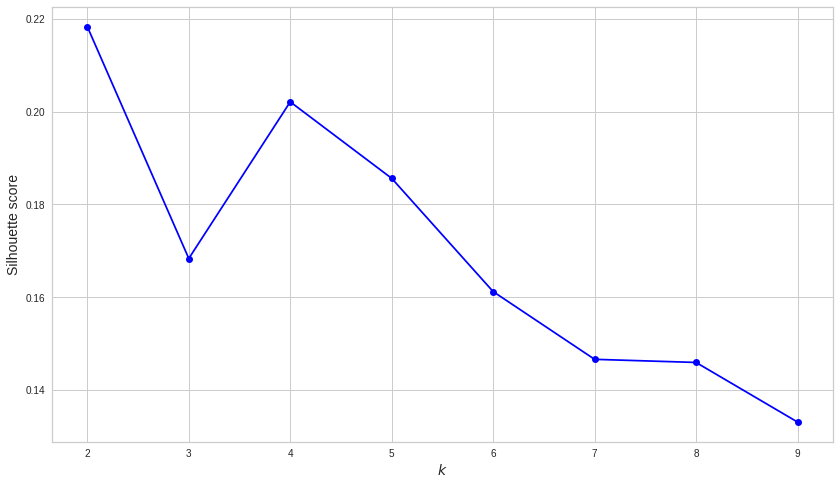

In [ ]:
plt.figure(figsize = (14,8) )

silhouette_scores = [silhouette_score(reduced_data, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-" ,color="blue")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

:Силуэт показал, что оптимальное число кластеров 2

##Алгоритм K-средних

In [ ]:
clusters = KMeans(n_clusters=2, random_state=42).fit(reduced_data)
data["Personality4"]= clusters.labels_

data.head()

,Education,Marital_Status,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Chlidren,Amount_Spent,Number_Of_Purchases,TotalAcceptedCmp,income,age,Customer_Since,Personality4
0,0,0,58,3,7,0,1,0,1617,22,0,0.235327,65,3682,1
1,0,0,38,2,5,0,0,2,27,4,0,-0.235826,68,2836,0
2,0,1,26,1,4,0,0,0,776,20,0,0.773633,57,3183,1
3,0,1,26,2,6,0,0,1,53,6,0,-1.022732,38,2776,0
4,1,1,94,5,5,0,0,1,422,14,0,0.241519,41,3032,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


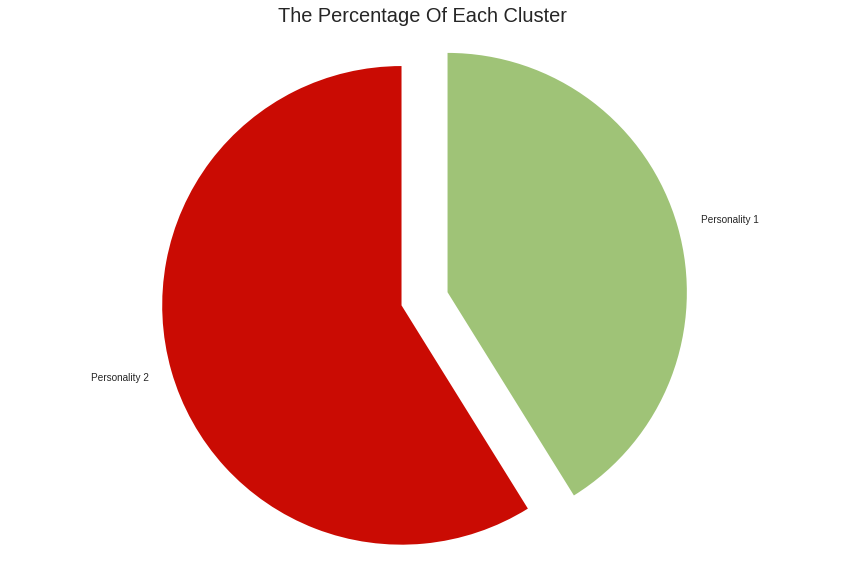

In [ ]:
plt.figure(figsize = (15,10) )
plt.pie(list(data['Personality4'].value_counts()),labels=['Personality 2' , 'Personality 1'],
         colors= "RGB", startangle=90  , explode =(0.1,0.1))
plt.title('The Percentage Of Each Cluster ' ,fontsize = 20)
plt.axis('equal')
plt.show()

In [ ]:
dd= data["Personality4"]
perc= ((len(data[data["Personality4"]==0]))/len(dd))*100
print("Percentage of customers in personality 0 = {:.2f}% ".format(perc))

perc= ((len(data[data["Personality4"] ==1]))/len(dd))*100
print("Percentage of customers  in personality 1 = {:.2f}% ".format(perc))

Percentage of customers in personality 0 = 58.85% 
Percentage of customers  in personality 1 = 41.15% 


#Анализ данных

In [ ]:
data.head()

,Education,Marital_Status,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Chlidren,Amount_Spent,Number_Of_Purchases,TotalAcceptedCmp,income,age,Customer_Since,Personality4
0,0,0,58,3,7,0,1,0,1617,22,0,0.235327,65,3682,1
1,0,0,38,2,5,0,0,2,27,4,0,-0.235826,68,2836,0
2,0,1,26,1,4,0,0,0,776,20,0,0.773633,57,3183,1
3,0,1,26,2,6,0,0,1,53,6,0,-1.022732,38,2776,0
4,1,1,94,5,5,0,0,1,422,14,0,0.241519,41,3032,0


In [ ]:
personal = data[['Education','Marital_Status','Chlidren']]
left = data[['Recency','NumDealsPurchases','NumWebVisitsMonth',	'Complain',	'Response',
                                          'TotalAcceptedCmp',	'Customer_Since']]
inc_age_plus = data[['age','income','Amount_Spent',	'Number_Of_Purchases']]

#**Модель на двух кластерах**

In [ ]:
#График оценки плотности ядра позволяет более интуитивно увидеть характеристики распределения самой выборки данных

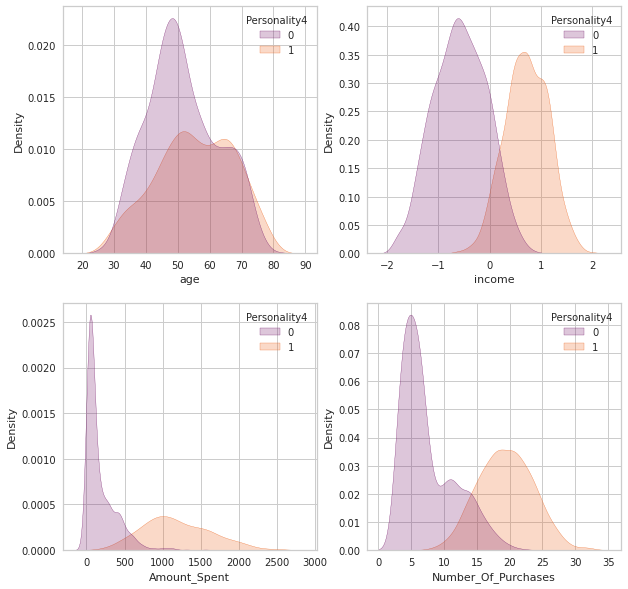

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
sns.set_style('dark')
for variable, subplot in zip(inc_age_plus,ax.flatten()):
  sns.kdeplot(data = data,x=variable,hue='Personality4',ax=subplot,palette='inferno',shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


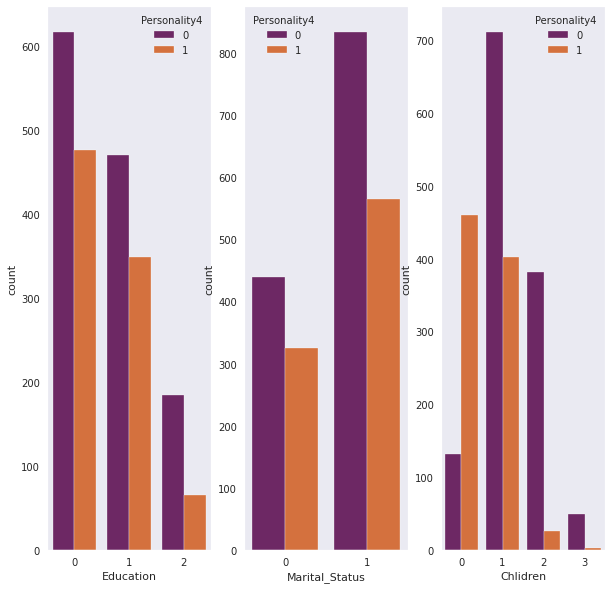

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(10,10))
sns.set_style('darkgrid')
for variable, subplot in zip(personal,ax.flatten()):
  sns.countplot(data[variable],hue=data['Personality4'],ax=subplot,palette='inferno')

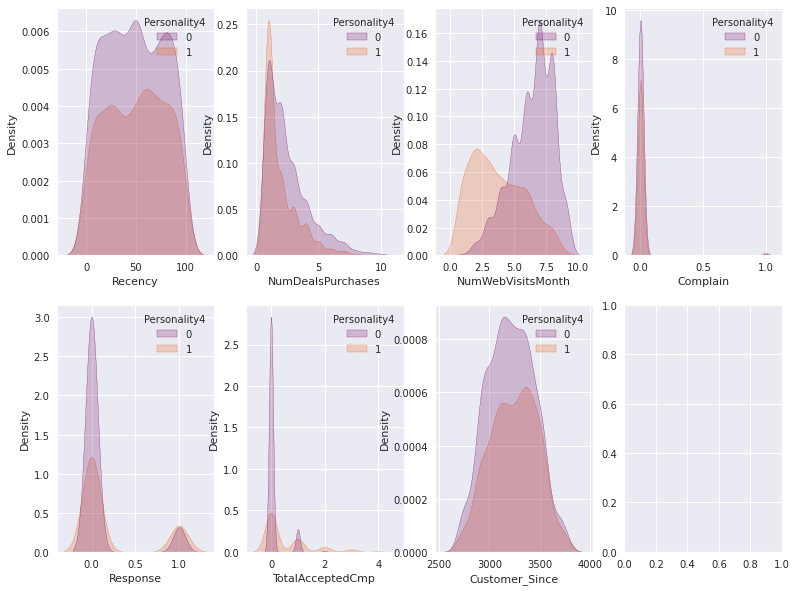

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(13,10))
sns.set_style('darkgrid')
for variable, subplot in zip(left,ax.flatten()):
  sns.kdeplot(data= data,x=variable,hue='Personality4',ax=subplot,palette='inferno', shade = True)

In [ ]:

d= data[data["Personality4"]==0]
perc= (len(d[d["age"] < 55])/len(d))*100
print("Percentage of customer below 55 in personality 0= {:.2f}% ".format(perc))

d= data[data["Personality4"]==1]
perc= (len(d[d["age"] > 50])/len(d))*100
print("Percentage of customer below 65 in personality 1= {:.2f}% ".format(perc))

Percentage of customer below 55 in personality 0= 64.34% 
Percentage of customer below 65 in personality 1= 64.61% 


In [ ]:
#personality 0 kids stats
d= data[data["Personality4"]==0]
perc= ((len(d[d["Chlidren"]==1]) + len(d[d["Chlidren"]==2]))/len(d))*100
print("Percentage of customers having 1-2 kids in personality 0 = {:.2f}% ".format(perc))

#personality 1 kids stats
d= data[data["Personality4"]==1]
perc= ((len(d[d["Chlidren"]==0]))/len(d))*100
print("Percentage of customers having 0 kids in personality 1 = {:.2f}% ".format(perc))

Percentage of customers having 1-2 kids in personality 0 = 85.78% 
Percentage of customers having 0 kids in personality 1 = 51.69% 


In [ ]:
#education breakdown

d= data[data["Personality4"]==0]
perc= ((len(d[d["Education"]==0]) + len(d[d["Education"]==1]))/len(d))*100
print("Percentage of customers having higher education in personality 0 = {:.2f}% ".format(perc))


d= data[data["Personality4"]==1]
perc= ((len(d[d["Education"]==1]) + len(d[d["Education"]==0]))/len(d))*100
print("Percentage of customers having higher education in personality 1 = {:.2f}% ".format(perc))

Percentage of customers having higher education in personality 0 = 85.47% 
Percentage of customers having higher education in personality 1 = 92.70% 


Бизнес статс для категорий продуктов

In [ ]:

d= data[data["Personality4"]==0]
perc= ((len(d[d["Amount_Spent"] < 400]))/len(d))*100
print("Percentage of customers spending less than 400 in personality 0 = {:.2f}% ".format(perc))


d= data[data["Personality4"]==1]
perc= ((len(d[d["Amount_Spent"] > 750]))/len(d))*100
print("Percentage of customers spending more than 1000 in personality 1 = {:.2f}% ".format(perc))

Percentage of customers spending less than 400 in personality 0 = 85.47% 
Percentage of customers spending more than 1000 in personality 1 = 83.37% 


In [ ]:
d= data[data["Personality4"]==0]
perc= ((len(d[d["Recency"] <= 30]))/len(d))*100
print("Percentage of customers spending less than 400 in personality 0 = {:.2f}% ".format(perc))


d= data[data["Personality4"]==1]
perc= ((len(d[d["Recency"] <= 30]))/len(d))*100
print("Percentage of customers spending more than 1000 in personality 1 = {:.2f}% ".format(perc))

Percentage of customers spending less than 400 in personality 0 = 31.89% 
Percentage of customers spending more than 1000 in personality 1 = 32.13% 


##Построение класификаторов на двух кластерах

In [ ]:
data_copy = data.copy()
scaler = StandardScaler()
scaler.fit(data_copy)
scaled_dss = pd.DataFrame(scaler.transform(data_copy), columns = data_copy.columns)
X = scaled_dss.loc[:, scaled_dss.columns.isin(['Recency','NumDealsPurchases','NumWebVisitsMonth',	'Complain',	'Response',	'Amount_Spent',	'Number_Of_Purchases',
                                          'TotalAcceptedCmp',	'Customer_Since', 'Education','Marital_Status','Chlidren','age','income'])]
X.head

<bound method NDFrame.head of       Education  Marital_Status   Recency  NumDealsPurchases  \
0     -0.891107       -1.353201  0.302059           0.434874   
1     -0.891107       -1.353201 -0.390200          -0.172377   
2     -0.891107        0.738989 -0.805555          -0.779628   
3     -0.891107        0.738989 -0.805555          -0.172377   
4      0.569093        0.738989  1.548126           1.649375   
...         ...             ...       ...                ...   
2158  -0.891107        0.738989 -0.113296          -0.172377   
2159   0.569093        0.738989  0.232833           2.863877   
2160  -0.891107       -1.353201  1.444287          -0.779628   
2161   0.569093        0.738989 -1.428589          -0.172377   
2162   0.569093        0.738989 -0.320974           0.434874   

      NumWebVisitsMonth  Complain  Response  Chlidren  Amount_Spent  \
0              0.741748 -0.096606  2.426630 -1.291154      1.740515   
1             -0.150826 -0.096606 -0.412094  1.394198     -

In [ ]:
target = data.loc[:, data.columns.isin(['Personality4'])]
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.35,random_state = 0)
X.head

<bound method NDFrame.head of       Education  Marital_Status   Recency  NumDealsPurchases  \
0     -0.891107       -1.353201  0.302059           0.434874   
1     -0.891107       -1.353201 -0.390200          -0.172377   
2     -0.891107        0.738989 -0.805555          -0.779628   
3     -0.891107        0.738989 -0.805555          -0.172377   
4      0.569093        0.738989  1.548126           1.649375   
...         ...             ...       ...                ...   
2158  -0.891107        0.738989 -0.113296          -0.172377   
2159   0.569093        0.738989  0.232833           2.863877   
2160  -0.891107       -1.353201  1.444287          -0.779628   
2161   0.569093        0.738989 -1.428589          -0.172377   
2162   0.569093        0.738989 -0.320974           0.434874   

      NumWebVisitsMonth  Complain  Response  Chlidren  Amount_Spent  \
0              0.741748 -0.096606  2.426630 -1.291154      1.740515   
1             -0.150826 -0.096606 -0.412094  1.394198     -

In [ ]:
clf2 = LogisticRegression(penalty = 'l2',random_state = 0, solver = 'liblinear', max_iter = 30, multi_class ='auto')
clf2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=30, random_state=0, solver='liblinear')

In [ ]:
Score = clf2.score(X_test, y_test,sample_weight = None)
print(Score)
print("accuracy:"+str(np.average(cross_val_score(clf2, X_test, y_test, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(clf2, X_test, y_test,  scoring='f1'))))
print("precision:"+str(np.average(cross_val_score(clf2, X_test, y_test,  scoring='precision'))))
print("recall:"+str(np.average(cross_val_score(clf2, X_test, y_test,  scoring='recall'))))

0.9986807387862797
accuracy:0.9920616939700244
f1:0.9906238643246518


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

precision:0.9907647907647907
recall:0.990625


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

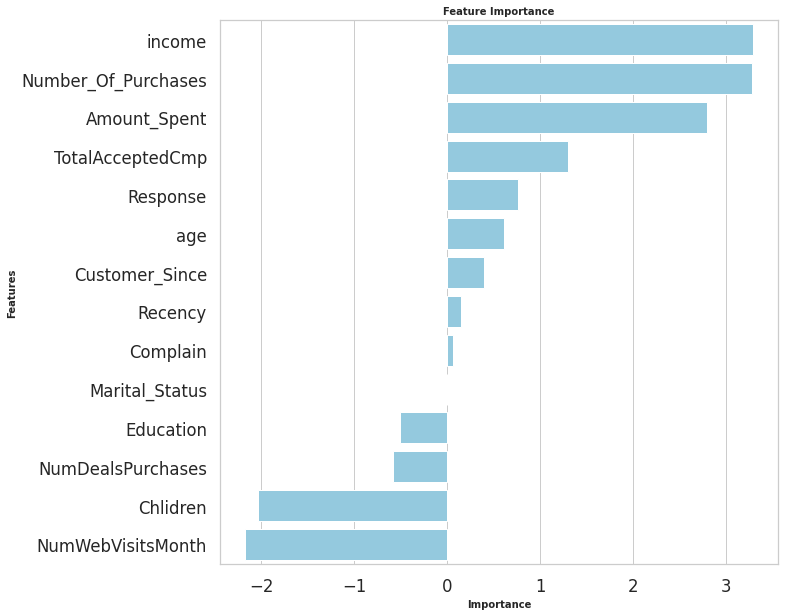

None

,Features,Importance
0,income,3.284504
1,Number_Of_Purchases,3.279850
2,Amount_Spent,2.789336
3,TotalAcceptedCmp,1.298471
4,Response,0.765196
5,age,0.612938
6,Customer_Since,0.399945
7,Recency,0.153447
8,Complain,0.060718
9,Marital_Status,0.003531


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
feats = { }
for feature, importance in zip(X.columns,clf2.coef_[0]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=10, weight = 'bold')
plt.ylabel('Features', fontsize=10, weight = 'bold')
plt.title('Feature Importance', fontsize=10, weight = 'bold')
display(plt.show())
display(importances)

тк точность класификатора 99% очень высока, значит в данных есть зависимости необходимые для построения этих кластеров,и они не много пересекающиеся